# Importing Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

# Loading the data set

In [22]:
data = pd.read_csv(r"C:\Excelr assignments\Assignment 12 Decision Tree\Company_Data.csv")

In [23]:
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


# Exploratory Data Analysis

In [24]:
data.duplicated().shape

(400,)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [28]:
data = pd.get_dummies(data,columns=['ShelveLoc','Urban','US'])

In [29]:
data 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


# Converting x Variable object into int or continuous 

In [58]:
array = data.values

In [59]:
array[:10,:]

array([[  9.5 , 138.  ,  73.  ,  11.  , 276.  , 120.  ,  42.  ,  17.  ,
          1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [ 11.22, 111.  ,  48.  ,  16.  , 260.  ,  83.  ,  65.  ,  10.  ,
          0.  ,   1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [ 10.06, 113.  ,  35.  ,  10.  , 269.  ,  80.  ,  59.  ,  12.  ,
          0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  7.4 , 117.  , 100.  ,   4.  , 466.  ,  97.  ,  55.  ,  14.  ,
          0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  4.15, 141.  ,  64.  ,   3.  , 340.  , 128.  ,  38.  ,  13.  ,
          1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,   0.  ],
       [ 10.81, 124.  , 113.  ,  13.  , 501.  ,  72.  ,  78.  ,  16.  ,
          1.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,   1.  ],
       [  6.63, 115.  , 105.  ,   0.  ,  45.  , 108.  ,  71.  ,  15.  ,
          0.  ,   0.  ,   1.  ,   0.  ,   1.  ,   1.  ,   0.  ],
       [ 11.85, 136.  ,  81.  ,  15.  , 4

In [60]:
x = array[:,1:]

In [61]:
y = array[:,0:1]

In [62]:
x

array([[138.,  73.,  11., ...,   1.,   0.,   1.],
       [111.,  48.,  16., ...,   1.,   0.,   1.],
       [113.,  35.,  10., ...,   1.,   0.,   1.],
       ...,
       [162.,  26.,  12., ...,   1.,   0.,   1.],
       [100.,  79.,   7., ...,   1.,   0.,   1.],
       [134.,  37.,   0., ...,   1.,   0.,   1.]])

In [63]:
y

array([[ 9.5 ],
       [11.22],
       [10.06],
       [ 7.4 ],
       [ 4.15],
       [10.81],
       [ 6.63],
       [11.85],
       [ 6.54],
       [ 4.69],
       [ 9.01],
       [11.96],
       [ 3.98],
       [10.96],
       [11.17],
       [ 8.71],
       [ 7.58],
       [12.29],
       [13.91],
       [ 8.73],
       [ 6.41],
       [12.13],
       [ 5.08],
       [ 5.87],
       [10.14],
       [14.9 ],
       [ 8.33],
       [ 5.27],
       [ 2.99],
       [ 7.81],
       [13.55],
       [ 8.25],
       [ 6.2 ],
       [ 8.77],
       [ 2.67],
       [11.07],
       [ 8.89],
       [ 4.95],
       [ 6.59],
       [ 3.24],
       [ 2.07],
       [ 7.96],
       [10.43],
       [ 4.12],
       [ 4.16],
       [ 4.56],
       [12.44],
       [ 4.38],
       [ 3.91],
       [10.61],
       [ 1.42],
       [ 4.42],
       [ 7.91],
       [ 6.92],
       [ 4.9 ],
       [ 6.85],
       [11.91],
       [ 0.91],
       [ 5.42],
       [ 5.21],
       [ 8.32],
       [ 7.32],
       [

# Feature Engineering for the data 

In [64]:
model = tree.DecisionTreeRegressor()

In [65]:
model.fit(x,y)

DecisionTreeRegressor()

In [66]:
print(model.feature_importances_)

[0.10025747 0.0770231  0.08014322 0.04316998 0.24277687 0.092572
 0.02440629 0.01145018 0.25051039 0.05881663 0.01039888 0.00219453
 0.00285724 0.00342322]


# Remodelling X variable

In [67]:
x = array[:,1:11]

In [68]:
x

array([[138.,  73.,  11., ...,   1.,   0.,   0.],
       [111.,  48.,  16., ...,   0.,   1.,   0.],
       [113.,  35.,  10., ...,   0.,   0.,   1.],
       ...,
       [162.,  26.,  12., ...,   0.,   0.,   1.],
       [100.,  79.,   7., ...,   1.,   0.,   0.],
       [134.,  37.,   0., ...,   0.,   1.,   0.]])

# Model Validation

In [132]:
model1 = DecisionTreeRegressor(max_depth=5,random_state=20,splitter='best',criterion='friedman_mse')

In [133]:
model1.fit(x,y)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, random_state=20)

[Text(0.5, 0.9166666666666666, 'x[8] <= 0.5\nfriedman_mse = 7.956\nsamples = 400\nvalue = 7.496'),
 Text(0.25, 0.75, 'x[4] <= 105.5\nfriedman_mse = 5.903\nsamples = 315\nvalue = 6.763'),
 Text(0.125, 0.5833333333333334, 'x[5] <= 54.5\nfriedman_mse = 5.265\nsamples = 108\nvalue = 8.189'),
 Text(0.0625, 0.4166666666666667, 'x[1] <= 57.5\nfriedman_mse = 3.69\nsamples = 43\nvalue = 9.413'),
 Text(0.03125, 0.25, 'x[2] <= 9.0\nfriedman_mse = 1.48\nsamples = 13\nvalue = 7.988'),
 Text(0.015625, 0.08333333333333333, 'friedman_mse = 0.81\nsamples = 9\nvalue = 7.369'),
 Text(0.046875, 0.08333333333333333, 'friedman_mse = 0.187\nsamples = 4\nvalue = 9.38'),
 Text(0.09375, 0.25, 'x[7] <= 0.5\nfriedman_mse = 3.386\nsamples = 30\nvalue = 10.03'),
 Text(0.078125, 0.08333333333333333, 'friedman_mse = 2.121\nsamples = 21\nvalue = 10.73'),
 Text(0.109375, 0.08333333333333333, 'friedman_mse = 2.528\nsamples = 9\nvalue = 8.397'),
 Text(0.1875, 0.4166666666666667, 'x[1] <= 105.5\nfriedman_mse = 4.662\nsamp

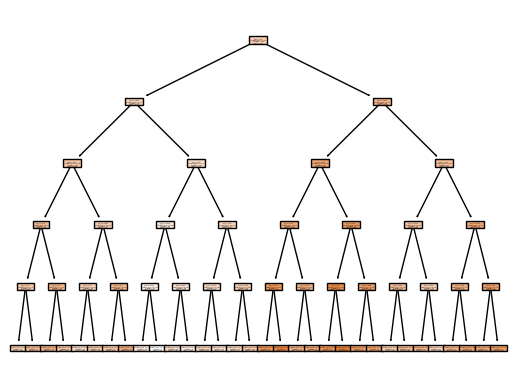

In [149]:
tree.plot_tree(model1,filled=True)

In [135]:
results.mean()

nan

[Text(0.5, 0.9166666666666666, 'ShelveLoc_Good <= 0.5\nfriedman_mse = 7.956\nsamples = 400\nvalue = 7.496'),
 Text(0.25, 0.75, 'Price <= 105.5\nfriedman_mse = 5.903\nsamples = 315\nvalue = 6.763'),
 Text(0.125, 0.5833333333333334, 'Age <= 54.5\nfriedman_mse = 5.265\nsamples = 108\nvalue = 8.189'),
 Text(0.0625, 0.4166666666666667, 'Income <= 57.5\nfriedman_mse = 3.69\nsamples = 43\nvalue = 9.413'),
 Text(0.03125, 0.25, 'Advertising <= 9.0\nfriedman_mse = 1.48\nsamples = 13\nvalue = 7.988'),
 Text(0.015625, 0.08333333333333333, 'friedman_mse = 0.81\nsamples = 9\nvalue = 7.369'),
 Text(0.046875, 0.08333333333333333, 'friedman_mse = 0.187\nsamples = 4\nvalue = 9.38'),
 Text(0.09375, 0.25, 'ShelveLoc_Bad <= 0.5\nfriedman_mse = 3.386\nsamples = 30\nvalue = 10.03'),
 Text(0.078125, 0.08333333333333333, 'friedman_mse = 2.121\nsamples = 21\nvalue = 10.73'),
 Text(0.109375, 0.08333333333333333, 'friedman_mse = 2.528\nsamples = 9\nvalue = 8.397'),
 Text(0.1875, 0.4166666666666667, 'Income <= 105

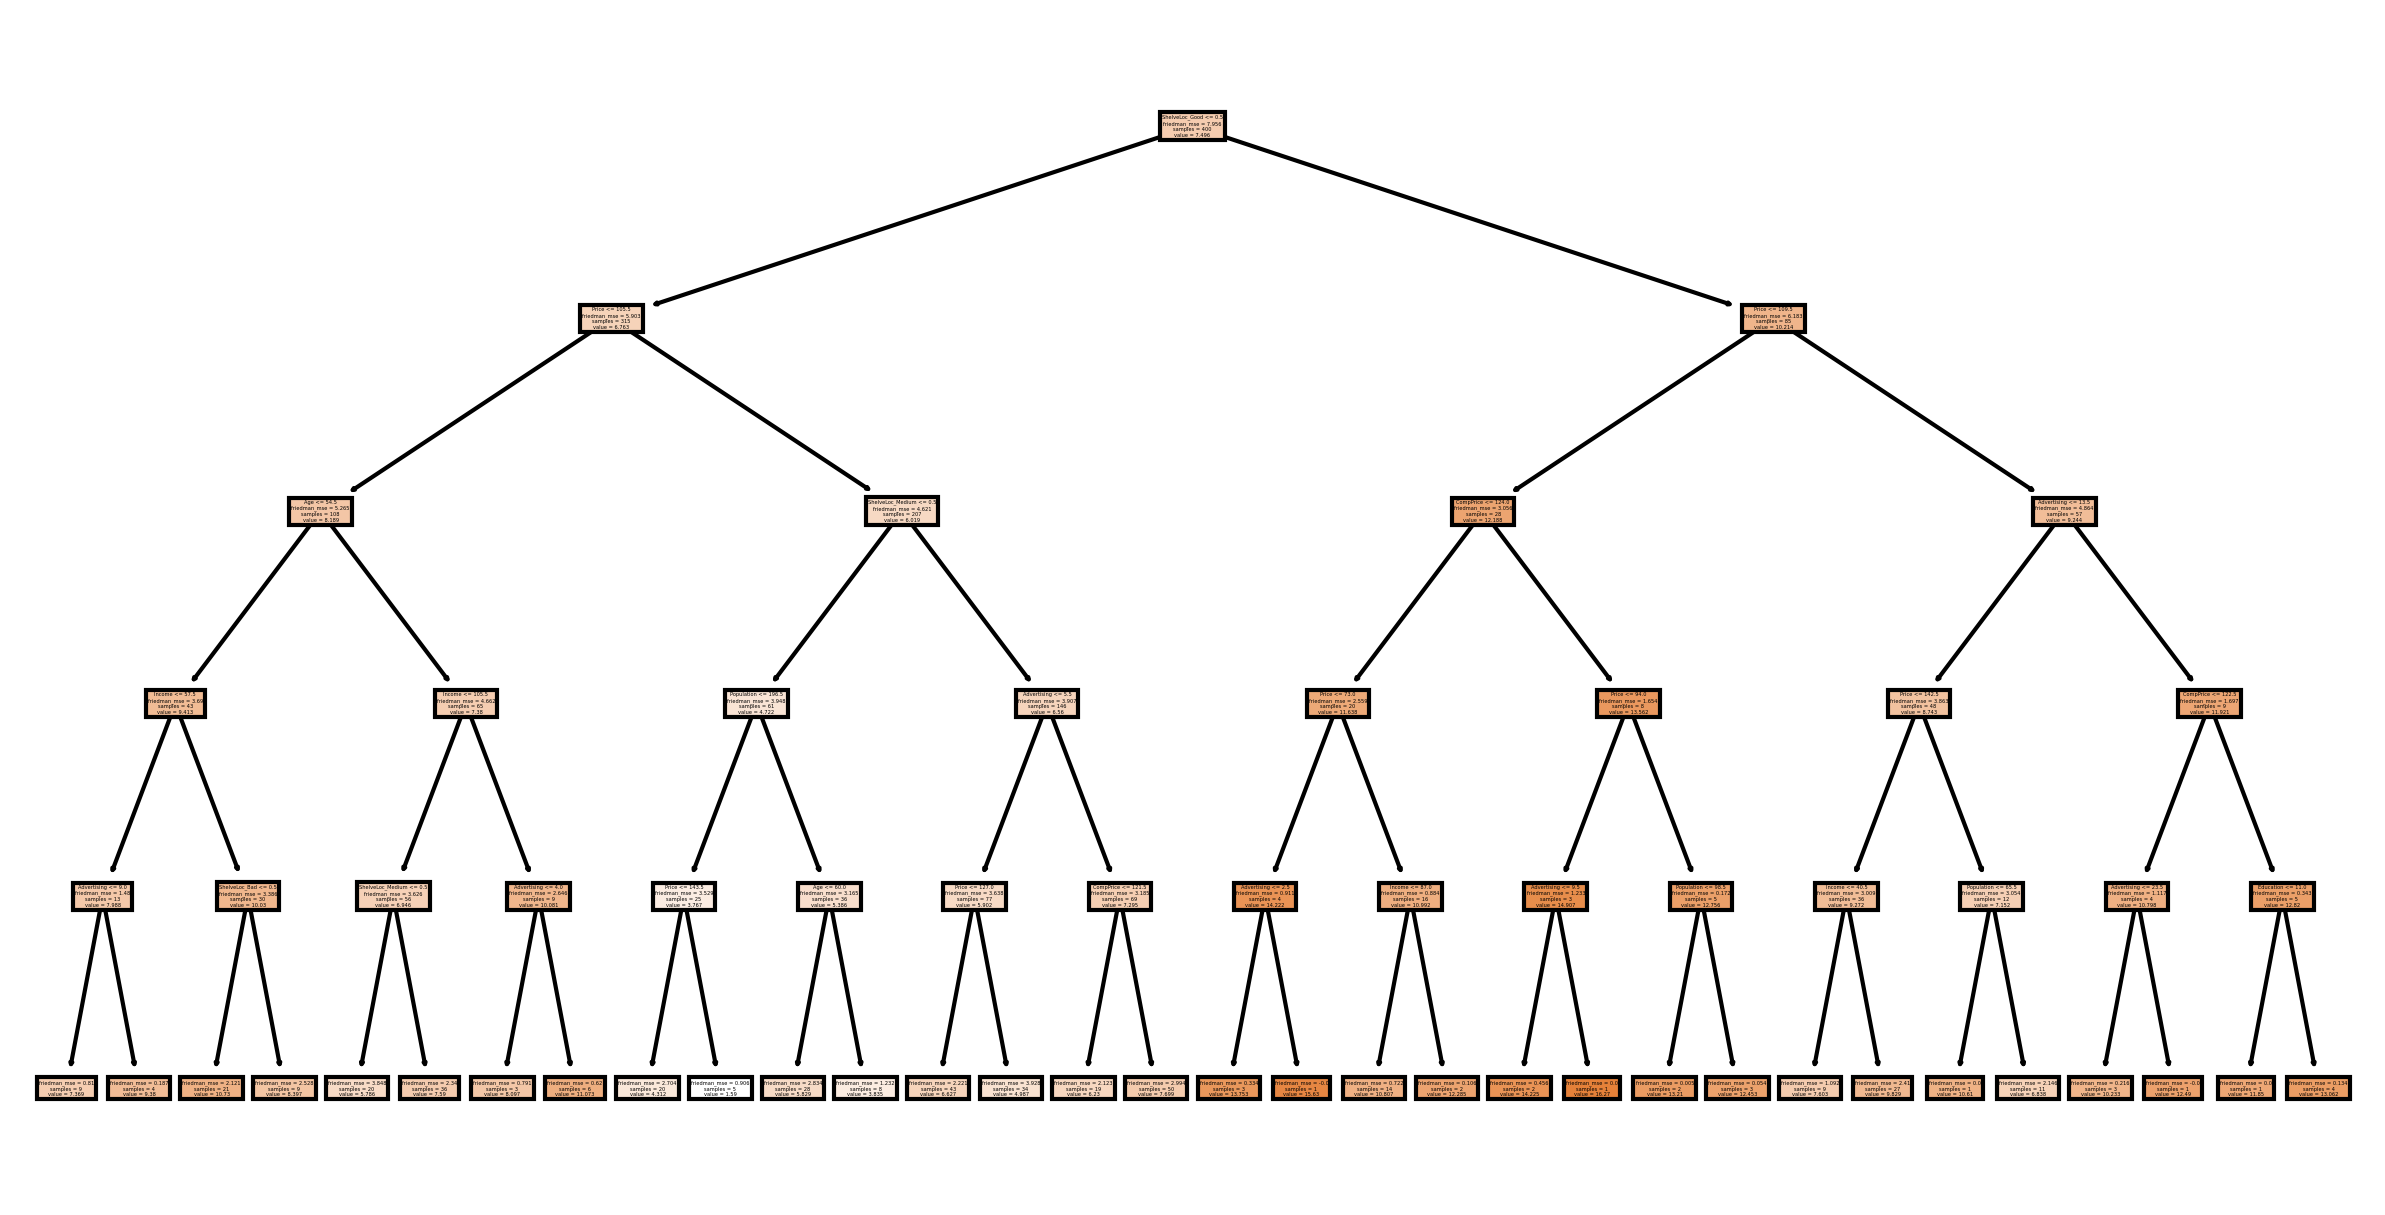

In [158]:
fn = ['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium']
cn = ['Sales']
fig, axis = plt.subplots(nrows=1,ncols=1,figsize = (10,5),dpi = 300)
tree.plot_tree(model1,feature_names=fn,class_names=cn,filled=True)

In [152]:
model1.score(x,y)

0.7103883129577